# Assignment 1. Python and libraries

**Deadline**: May 15, 9pm.

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

In [9]:
import torch
import torch.nn.functional as F

t_list = [1,2 ,3, 4,5]
tensor = torch.zeros([2, 4])
tensor[0][1] = 1;
print(tensor)

filters = torch.randn(3,3,1,1)
inputs = torch.randn(1,3,3,3)
print(F.conv2d(inputs, filters, padding=0).size())


tensor([[0., 1., 0., 0.],
        [0., 0., 0., 0.]])
torch.Size([1, 3, 3, 3])


In [0]:
def add_on(lst, new):
  for item in lst:
    item = item + (new,)

things = [(),(1,2),(1,)]
add_on(things, 99)
things

[(), (1, 2), (1,)]

In [0]:
import torch.nn as nn
import torch 

In [0]:
class TextGenerator(nn.Module):
  def __init__(self, vocab_size, hidden_size, n_layers=1):
    super(TextGenerator, self).__init__()
    self.ident = torch.eye(vocab_size)
    self.rnn = nn.GRU(input_size=vocab_size,
                   hidden_size=hidden_size,
                  num_layers=n_layers,
                   batch_first=True)
    self.decoder = nn.Linear(in_features=hidden_size,
    out_features=vocab_size)
  def forward(self, inp, hidden):
    inp = inp.view(1, -1)
    inp = self.ident[inp]
    output, hidden = self.rnn(inp, hidden)
    logits = self.decoder(output.squeeze(0))
    return logits, hidden


In [0]:
model = TextGenerator(vocab_size=10, hidden_size=16)
inp = torch.tensor([1, 0, 3, 2]) # a sequence with 4 tokens
hidden = torch.randn(1, 1, 16)
out, _ = model(inp, hidden)
out.shape

torch.Size([4, 10])

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://drive.google.com/open?id=1HnlDIYMEbXBP9m8CfY31GeAC5BXHcXNM


## Part 0. Environment Setup; Readings

Please refer to Colab instructions https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt

If you want to use Jupyter Notebook locally, please refer to https://www.cs.toronto.edu/~lczhang/aps360_20191/files/install.pdf

## Part 1. Python Basics [9 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 3pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [0]:
def sum_of_cubes(n):
  if n >= 0 and isinstance(n, int):
    sum = 0
    for x in range (n+1):
      sum += x ** 3
    return sum
  else: 
    print('invalid input')
    return -1  

In [0]:
sum_of_cubes(3)

36

In [0]:
sum_of_cubes(1)

1

### Part (b) -- 3pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [0]:
def word_lengths(sentence):
  ret = []
  for word in sentence.split():
    ret.append(len(word))
  return ret 

In [0]:
word_lengths("welcome to APS360!")

[7, 2, 7]

In [0]:
word_lengths("machine learning is so cool")

[7, 8, 2, 2, 4]

### Part (c) -- 3pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [0]:
def all_same_length(sentence):
  word_lens = word_lengths(sentence)
  for word_len in word_lens:
    if word_lens[0] != word_len:
      return False
  return True

In [0]:
all_same_length("all same length")

False

In [0]:
all_same_length("hello world")

True

## Part 2. NumPy Exercises [11 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [0]:
import numpy as np

### Part (a) -- 2pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [0]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [0]:
matrix.size

12

In [0]:
matrix.shape

(3, 4)

In [0]:
vector.size

4

In [0]:
vector.shape

(4,)

`<NumpyArray>.size` returns the number of elements in a numpy array

`<NumpyArray>.shape` returns a tuple, representing the dimension of the specified numpy array

### Part (c) -- 3pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [0]:
output = np.zeros(len(matrix))  
for i in range(len(matrix)):
    for j in range(len(vector)):
      output[i] += matrix[i,j] * vector[j]


In [0]:
output


array([ 4.,  8., -3.])

### Part (d) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [0]:
output2 = np.dot(matrix, vector)

In [0]:
output2

array([ 4.,  8., -3.])

### Part (e) -- 2pt

As a way to test for consistency, show that the two outputs match.

In [0]:
np.array_equal(output, output2)

True

### Part (f) -- 3pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [0]:
# diff1 is the time it takes to perform matrix mult
# through for loops 10000 times
import time

start_time1 = time.time()

for i in range(10000): 
  output = np.zeros(len(matrix))  
  for i in range(len(matrix)):
      for j in range(len(vector)):
        output[i] += matrix[i,j] * vector[j]   
      
end_time1 = time.time()
diff1 = end_time1 - start_time1

print(diff1)

0.1174464225769043


In [0]:
# diff2 is the time it takes for np.dot to perform matrix mult 10000 times
start_time2 = time.time()

for i in range(10000):
  output2 = np.dot(matrix, vector)    

end_time2 = time.time()
diff2 = end_time2 - start_time2

print(diff2)

0.010909557342529297


## Part 3. Callable Objects [11 pt]

A *callable object* is any object that can be called like a function.
In Python, any object whose class has a `__call__` method will be callable. 
For example, we can define an `AddBias` class that is initialized with a value `val`. When the object of the Adder class is called with `input`, it will return the sum of `val` and `input`:

In [0]:
class AddBias(object):       # this is a new class AddBias, which inherits from the class `object`
    def __init__(self, val): # this is the object constructor
        self.val = val
    def __call__(self, input):
        return self.val + input # `self` is like `this` in many languages

In [0]:
add4 = AddBias(4)
add4(3)

7

In [0]:
# AddBias works with numpy arrays as well

add1 = AddBias(1)
add1(np.array([3,4,5]))

array([4, 5, 6])

### Part (a) -- 2pt

Create a callable object class `ElementwiseMultiply` that is initialized with `weight`, which is a numpy array (with 1-dimension). 
When called on `input` of **the same shape** as `weight`, the object will output an elementwise product of `input` and `weight`. For example, the 1st element in the output will be a product of the first element of `input` and first element of `weight`. If the `input` and `weight` have different shape, do not return anything.

In [0]:
class ElementwiseMultiply(object):
  def __init__(self, weight):
    self.weight = weight
  def __call__(self, input):
    if self.weight.shape == input.shape:
      return np.multiply(self.weight, input)



In [0]:
# arrays with different shapes
a = ElementwiseMultiply(np.array([1,2]))
a(np.array([4,5,6]))

In [0]:
#arrays with the same shape
b = ElementwiseMultiply(np.array([1,2,3]))
b(np.array([4,5,6]))

array([ 4, 10, 18])

### Part (b) -- 4pt

Create a callable object class `LeakyRelu` that is initialized
with `alpha`, which is a scalar value. 
When called on input `x`, which may be a NumPy array, 
the object will output:

* $x$ if $x \ge 0$
* $\alpha x$ if $x < 0$

For example,

```
>>> leaky_relu = LeakyRelu(0.1)
>>> leaky_relu(1)
1
>>> leaky_relu(-1)
-0.1
>>> x = np.array([1, -1])
>>> leaky_relu(x)
np.array([1, -0.1])
```

To obtain full marks, do **not** use any for-loops to implement this class.

In [0]:
import numbers
class LeakyRelu(object):
  def __init__(self, _alpha):
    self.alpha = _alpha
  def __call__(self, input):
    if isinstance(input, np.ndarray):
      input = np.array(input, dtype = 'float64')
      input[input < 0] *= self.alpha
      return input
    elif isinstance(input, numbers.Number):
      if(input < 0):
        input *= self.alpha
      return input
    else:
      print('invalid input')
      return -1

In [0]:
leaky_relu = LeakyRelu(0.1)
leaky_relu(1)

1

In [0]:
leaky_relu(-1)

-0.1

In [0]:
x = np.array([1, -1])
leaky_relu(x)

array([ 1. , -0.1])

### Part (c) -- 4pt

Create a callable object class `Compose` that is initialized with `layers`, which is a list of callable objects each taking in one argument when called. For example, `layers` can be something like `[add1, add4]` that we created above. Each `add1` and `add4` take in one argument. When `Compose` object is called on **a single argument**, the object will output a composition of object calls in `layers`, in the order given in `layers` (e.g. `add1` will be called first and then `add4` will be called after using the result from `add1` call)

In [0]:
class Compose(object):
  def __init__(self, _layers):
    self.layers = _layers
  def __call__(self, input):
    arg = input
    for obj in self.layers:
      arg = obj(arg)
    return arg


### Part (d) -- 1pt

Run the below code and include the output in your report.

In [0]:
weight_1 = np.array([1, 2, 3, 4.])
weight_2 = np.array([-1, -2, -3, -4.])
bias_1 = 3.0
bias_2 = -2.0
alpha = 0.1

elem_mult_1 = ElementwiseMultiply(weight_1)
add_bias_1 = AddBias(bias_1)
leaky_relu = LeakyRelu(alpha)
elem_mult_2 = ElementwiseMultiply(weight_2)
add_bias_2 = AddBias(bias_2)
layers = Compose([elem_mult_1, 
                  add_bias_1, 
                  leaky_relu,
                  elem_mult_2, 
                  add_bias_2, 
                  leaky_relu])

input = np.array([10, 5, -5, -10.])
print("Input: ", input)

output = layers(input)
print("Output:", output)

Input:  [ 10.   5.  -5. -10.]
Output: [-1.5 -2.8  1.6 12.8]


## Part 4. Images [7 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [0]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt
Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.
Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [0]:
img = plt.imread('https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews')

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

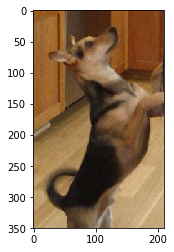

In [0]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

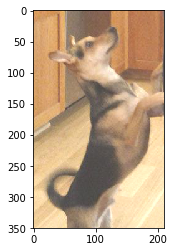

In [0]:
img_add = img + 0.25
np.clip(img_add, 0, 1, img_add)
plt.imshow(img_add)

### Part (d) -- 3pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

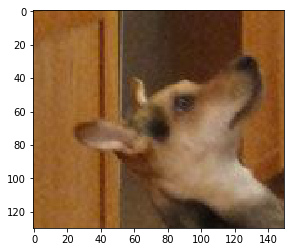

In [0]:
img_cropped = img[:130, :150, :3]
plt.imshow(img_cropped)

## Part 5. Basics of PyTorch [12 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [0]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [0]:
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [0]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [0]:
#this number is based on the dimensions of the img_torch
130*150*3

58500

### Part (d) -- 3 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [0]:
# torch image H x W x C
# transposed image C x W x H
img_torch.transpose(0,2)


tensor([[[0.5882, 0.5412, 0.6157,  ..., 0.6039, 0.5882, 0.5804],
         [0.5765, 0.5647, 0.6196,  ..., 0.6078, 0.6078, 0.6039],
         [0.5569, 0.5961, 0.6196,  ..., 0.6118, 0.6196, 0.6235],
         ...,
         [0.5804, 0.5882, 0.5922,  ..., 0.3804, 0.3882, 0.4196],
         [0.6039, 0.6078, 0.6157,  ..., 0.3765, 0.3804, 0.4039],
         [0.6157, 0.6196, 0.6275,  ..., 0.3765, 0.3804, 0.3961]],

        [[0.3725, 0.3216, 0.3765,  ..., 0.3882, 0.3725, 0.3647],
         [0.3608, 0.3451, 0.3843,  ..., 0.3922, 0.3922, 0.3882],
         [0.3412, 0.3765, 0.3843,  ..., 0.3961, 0.4039, 0.4078],
         ...,
         [0.3412, 0.3490, 0.3529,  ..., 0.3098, 0.3176, 0.3373],
         [0.3647, 0.3686, 0.3765,  ..., 0.3059, 0.3098, 0.3216],
         [0.3765, 0.3804, 0.3882,  ..., 0.3098, 0.3098, 0.3137]],

        [[0.1490, 0.0902, 0.1529,  ..., 0.1686, 0.1529, 0.1451],
         [0.1373, 0.1137, 0.1490,  ..., 0.1686, 0.1725, 0.1686],
         [0.1176, 0.1451, 0.1412,  ..., 0.1725, 0.1804, 0.

In [0]:
print(img_torch.transpose(0,2).shape)
print(img_torch.shape)

torch.Size([3, 150, 130])
torch.Size([130, 150, 3])


img_torch.transpose(0, 2) swaps the first and the third axes. The original image is arranged by height x width x colour, while the transposed image is  arraged by colour x width x height. 

The expression return a tensor that is a transposed version of input after the axes are swapped.

The content of the original img_torch is not updated and it also maintains its the original dimension.
However, the resulting out tensor shares it's underlying storage with the input tensor, so changing the content of one would change the content of the other.

 ### Part (e) -- 3 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [0]:
img_torch.unsqueeze(0)
print(img_torch.unsqueeze(0).shape)
print(img_torch.shape)

torch.Size([1, 130, 150, 3])
torch.Size([130, 150, 3])


img_torch.unsqueeze(0) returns a new tensor with a dimension of size one inserted at the specified position (position '0' in this case).

The expression returns the resulting matrix with the new dimension inserted.

The original content of img_torch is not updated and it also maintains its original dimension.
However, the returned tensor shares the same underlying data with the input tensor.

### Part (f) -- 3 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [0]:
torch.tensor([torch.max(img_torch[:,:,0]), torch.max(img_torch[:,:,1]), 
              torch.max(img_torch[:,:,2])])

tensor([0.8941, 0.7882, 0.6745])